## Import packages

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the dataet

In [12]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.shape

(1000, 8)

In [14]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [19]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
print('Categories in "gender" variable:    ', end='')
print(df.gender.unique())

print('Categories in "race_ethnicity" variable:    ', end='')
print(df.race_ethnicity.unique())

print('Categories in "parental_level_of_education" variable:    ', end='')
print(df.parental_level_of_education.unique())

print('Categories in "lunch:    ', end='')
print(df.lunch.unique())

print('Categories in "test_preparation_course:    ', end='')
print(df.test_preparation_course.unique())

Categories in "gender" variable:    ['female' 'male']
Categories in "race_ethnicity" variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental_level_of_education" variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "lunch:    ['standard' 'free/reduced']
Categories in "test_preparation_course:    ['none' 'completed']


In [34]:
numaric_fuatures = [feature for feature in df.columns if df[feature].dtype !='O']
catogorical_fuatures = [feature for feature in df.columns if df[feature].dtype =='O']

print('we have {} numarical features: {}'.format(len(numaric_fuatures), numaric_fuatures))
print('we have {} catogorical features: {}'.format(len(catogorical_fuatures), catogorical_fuatures))

we have 3 numarical features: ['math_score', 'reading_score', 'writing_score']
we have 5 catogorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [44]:
# Addming columns to Total Score and average score
df['total_score'] = df.math_score + df.reading_score + df.writing_score
df['average'] = df.total_score/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [40]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'number of students with full marks for reading: {reading_full}')
print(f'number of students with full marks for writing: {writing_full}')
print(f'number of students with full marks for math: {math_full}')

number of students with full marks for reading: 17
number of students with full marks for writing: 14
number of students with full marks for math: 7


## Exploring data (visualization)

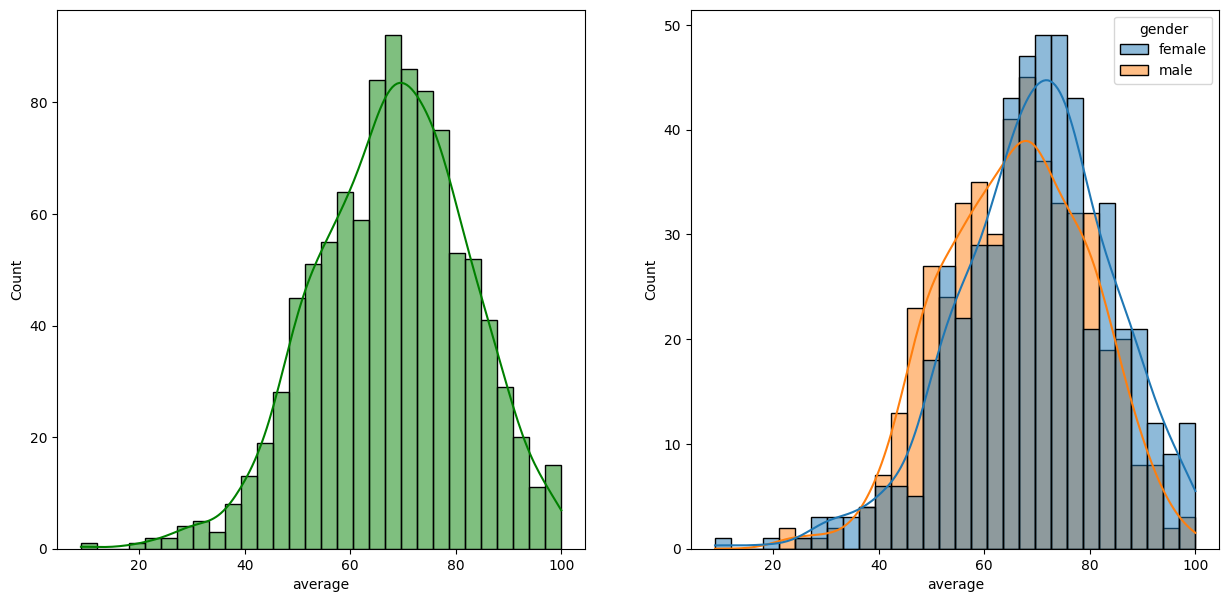

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')
plt.show()

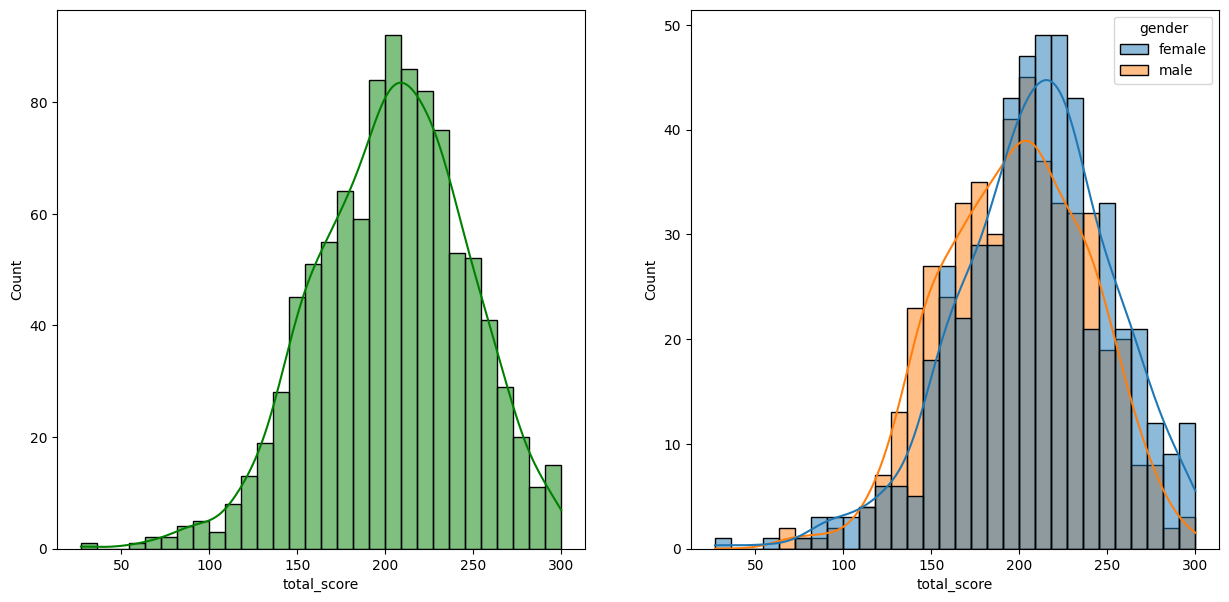

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')
plt.show()

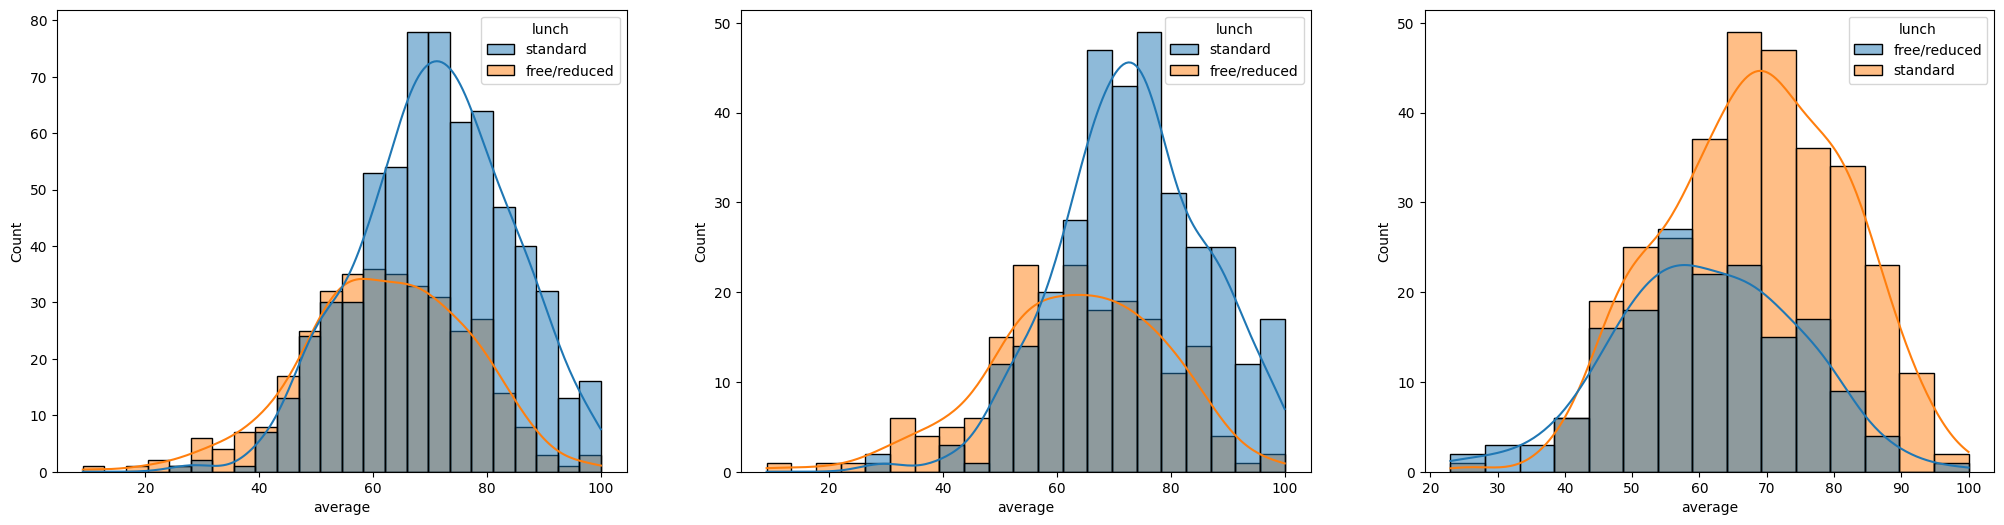

In [58]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

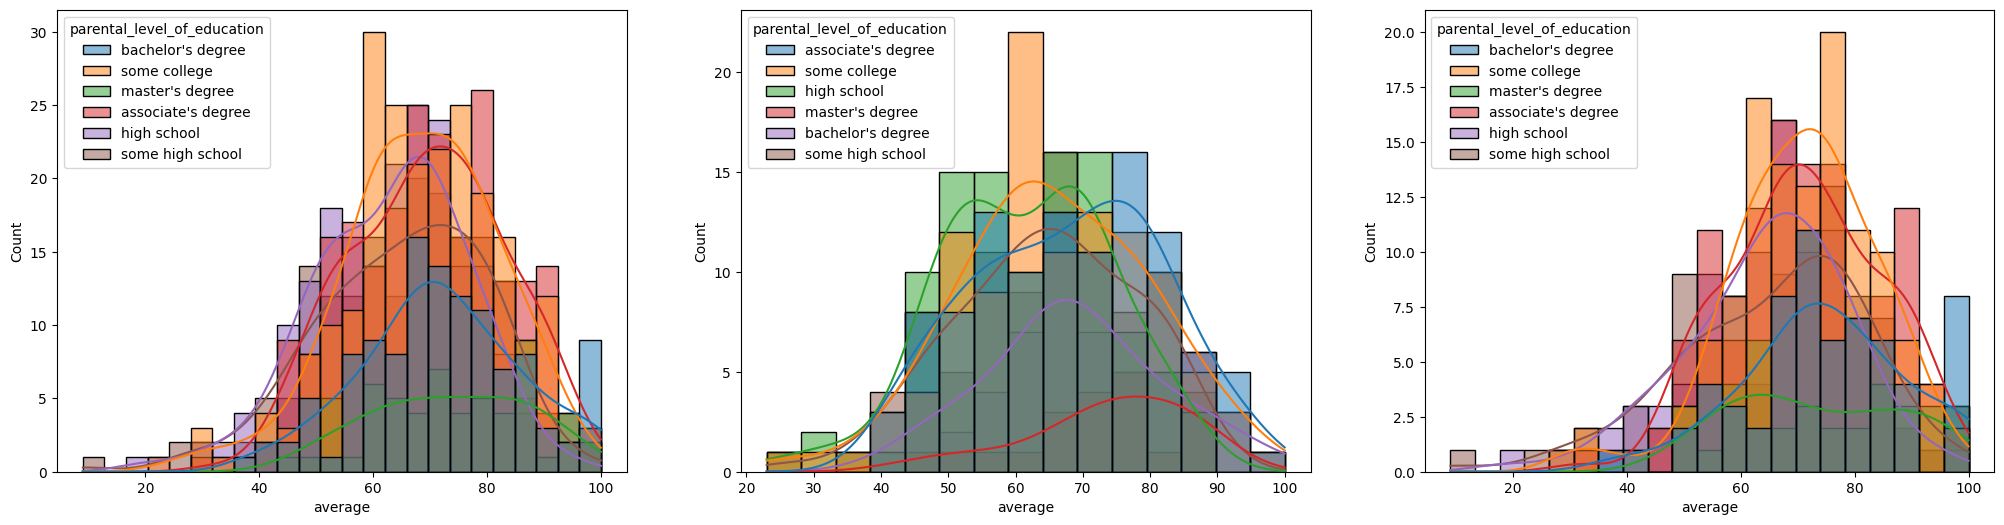

In [62]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x = 'average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x = 'average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x = 'average', kde=True, hue='parental_level_of_education')
plt.show()

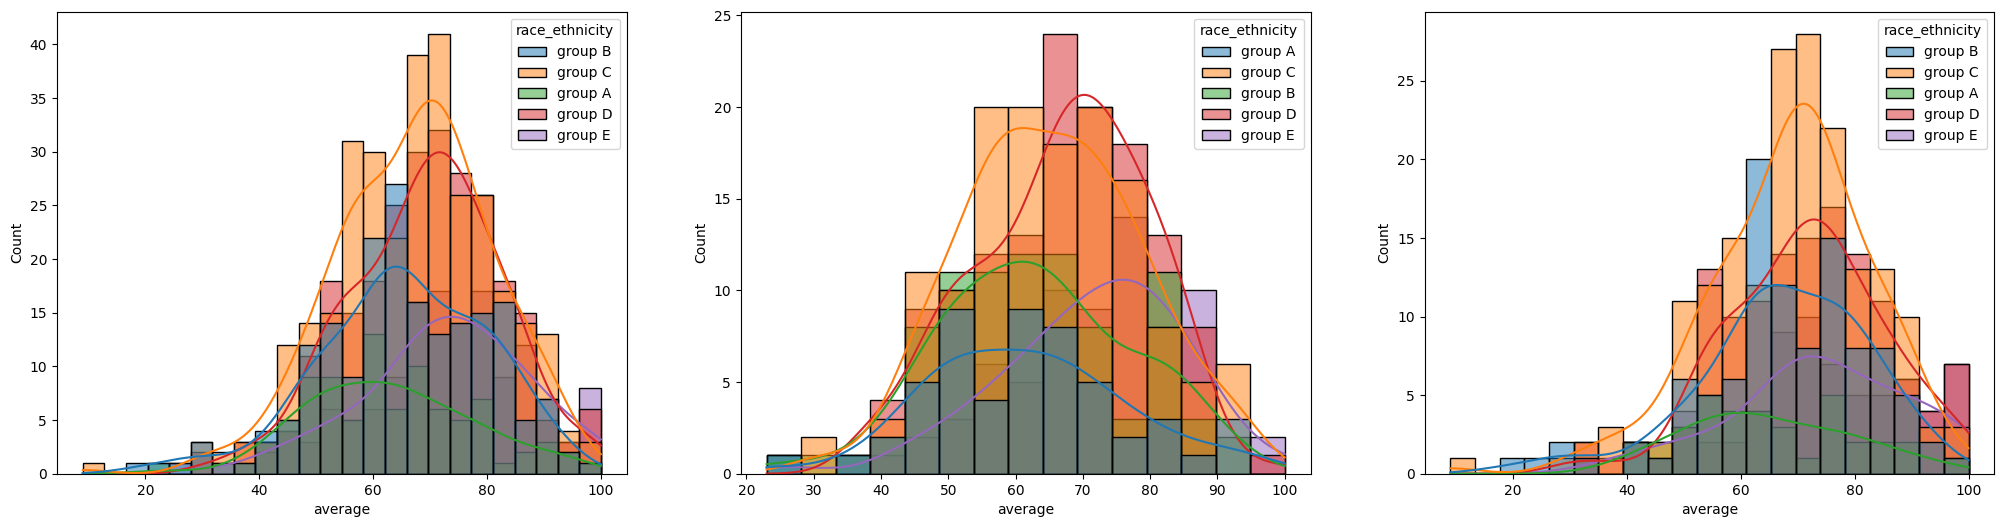

In [63]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x = 'average', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x = 'average', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x = 'average', kde=True, hue='race_ethnicity')
plt.show()

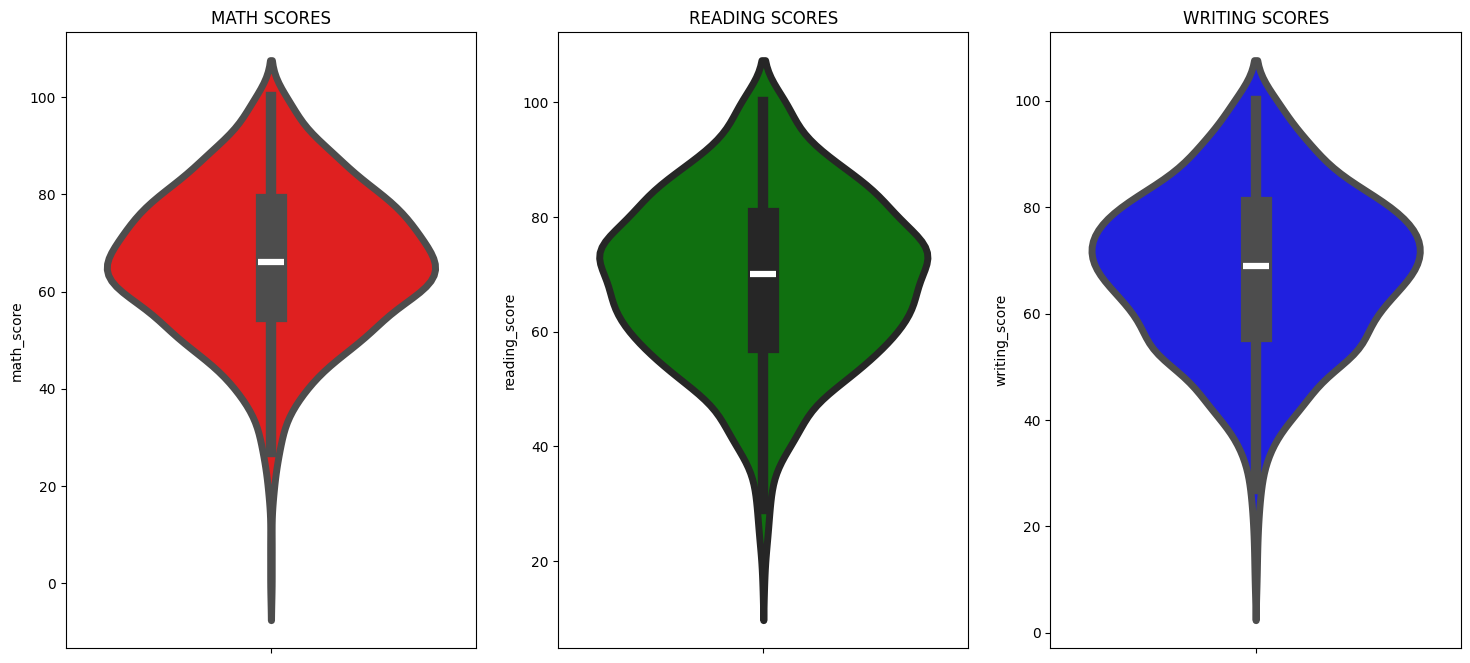

In [72]:
plt.subplots(1, 3, figsize=(18, 8))
plt.subplot(131)
plt.title('MATH SCORES')
sns.violinplot(data=df, y='math_score', color='red', linewidth=5)
plt.subplot(132)
plt.title('READING SCORES')
sns.violinplot(data=df, y='reading_score', color='green', linewidth=5)
plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(data=df, y='writing_score', color='blue', linewidth=5)
plt.show()

In [92]:
df.race_ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

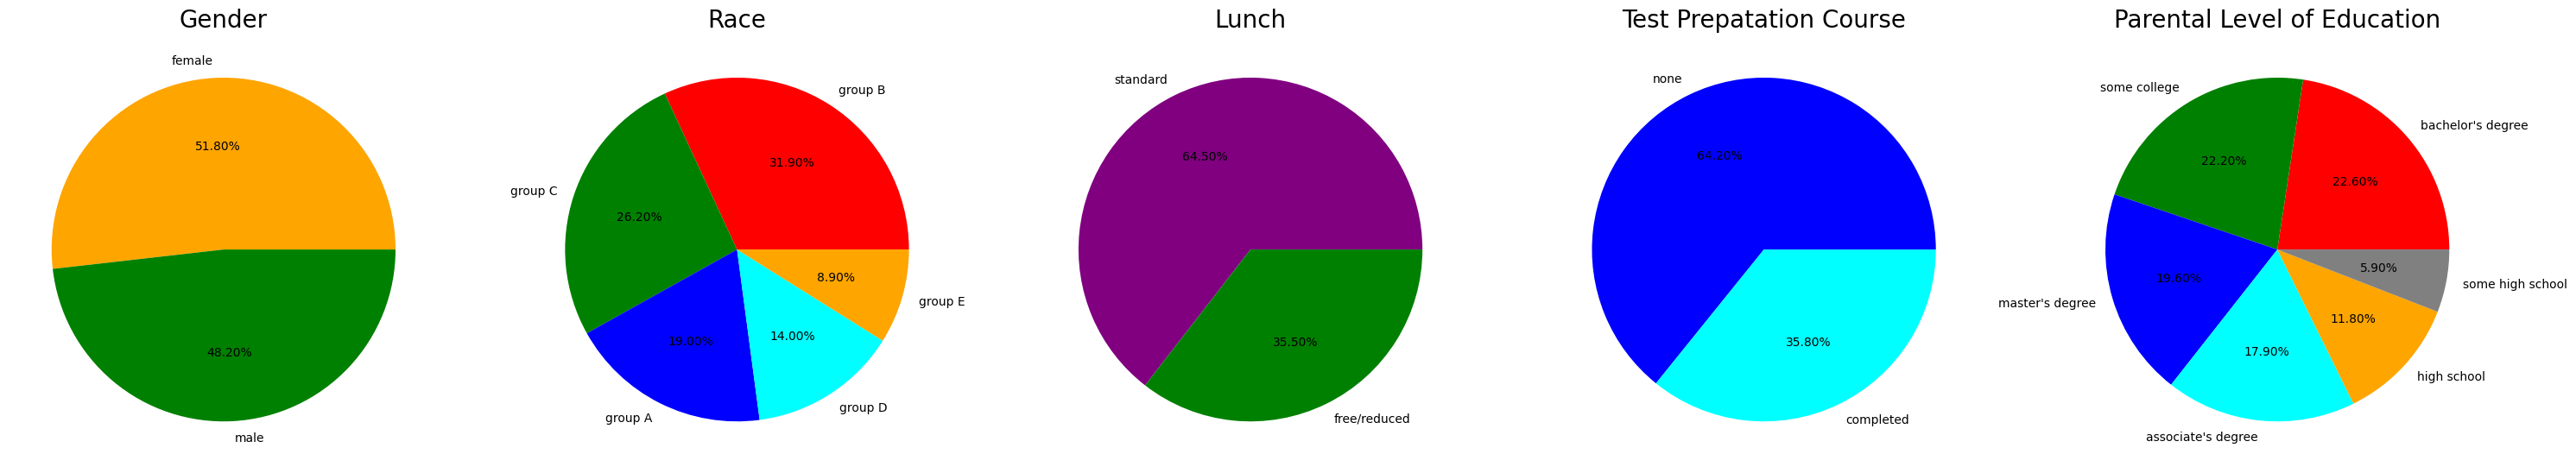

In [103]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(151)
size=df.gender.value_counts()
labels = df.gender.unique()
color= ['orange', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize= 20)

plt.subplot(152)
size=df.race_ethnicity.value_counts()
labels=df.race_ethnicity.unique()
color=['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race', fontsize= 20)

plt.subplot(153)
size=df.lunch.value_counts()
labels=df.lunch.unique()
color=['purple', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize= 20)

plt.subplot(154)
size=df.test_preparation_course.value_counts()
labels=df.test_preparation_course.unique()
color=['blue', 'cyan']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Prepatation Course', fontsize= 20)

plt.subplot(155)
size=df.parental_level_of_education.value_counts()
labels=df.parental_level_of_education.unique()
color=['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education', fontsize= 20)

plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

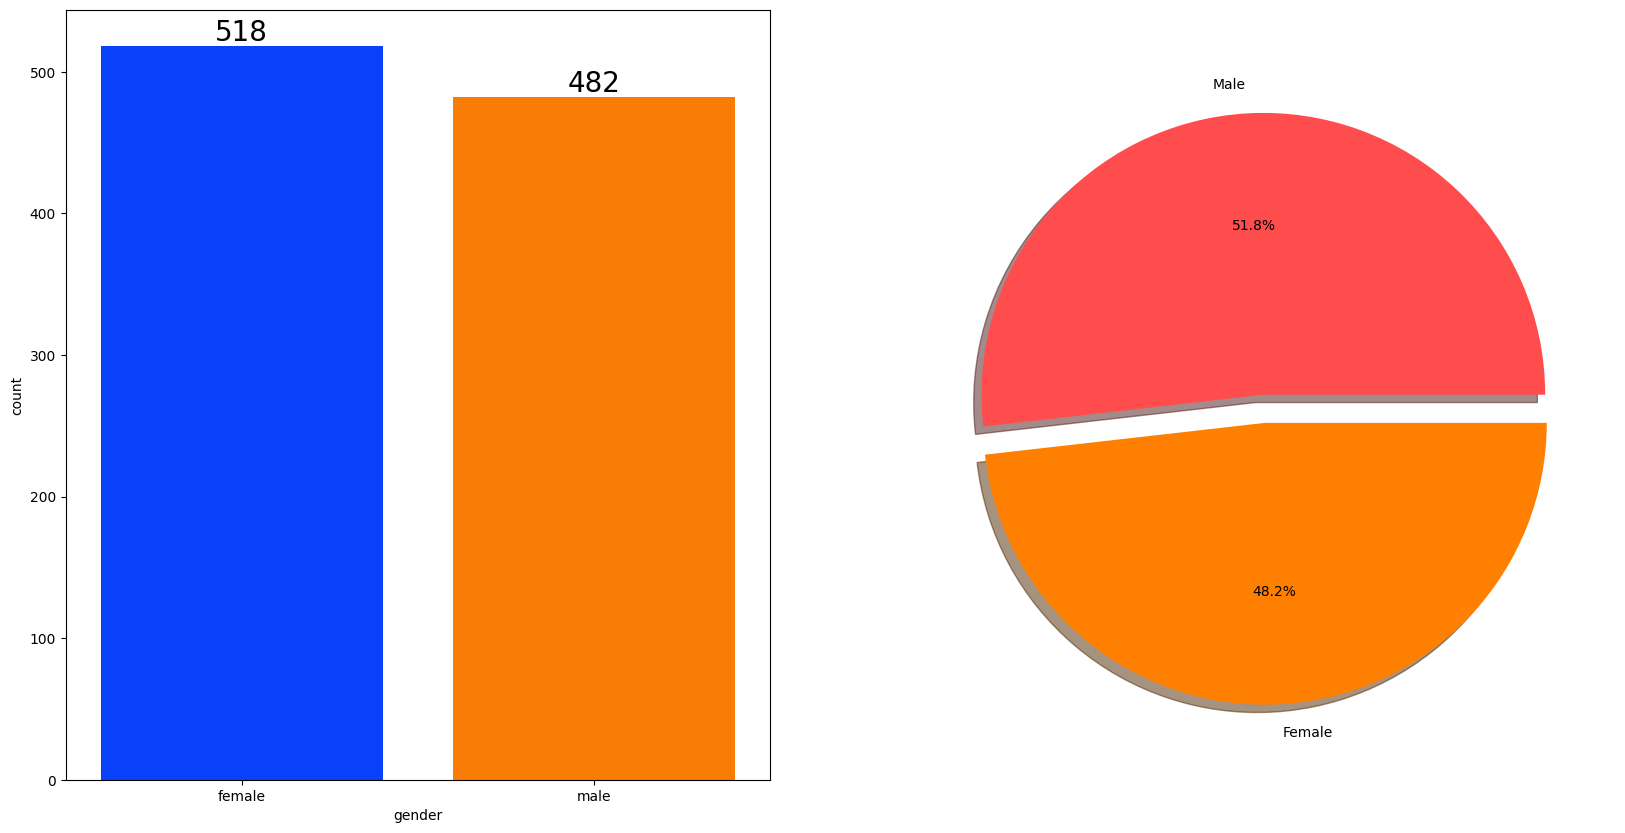

In [106]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [142]:
gender_group = df.groupby('gender')[[feature for feature in df.columns if df[feature].dtype !='O']].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


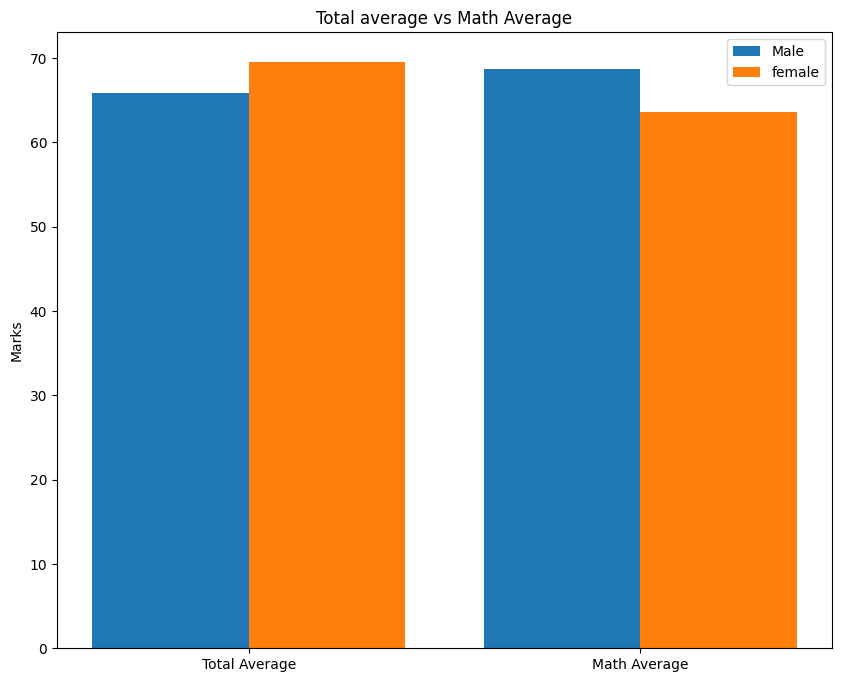

In [160]:

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']
female_scores = [gender_group.average[0], gender_group.math_score[0]]
male_scores = [gender_group.average[1], gender_group.math_score[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total average vs Math Average')
plt.legend()
plt.show()

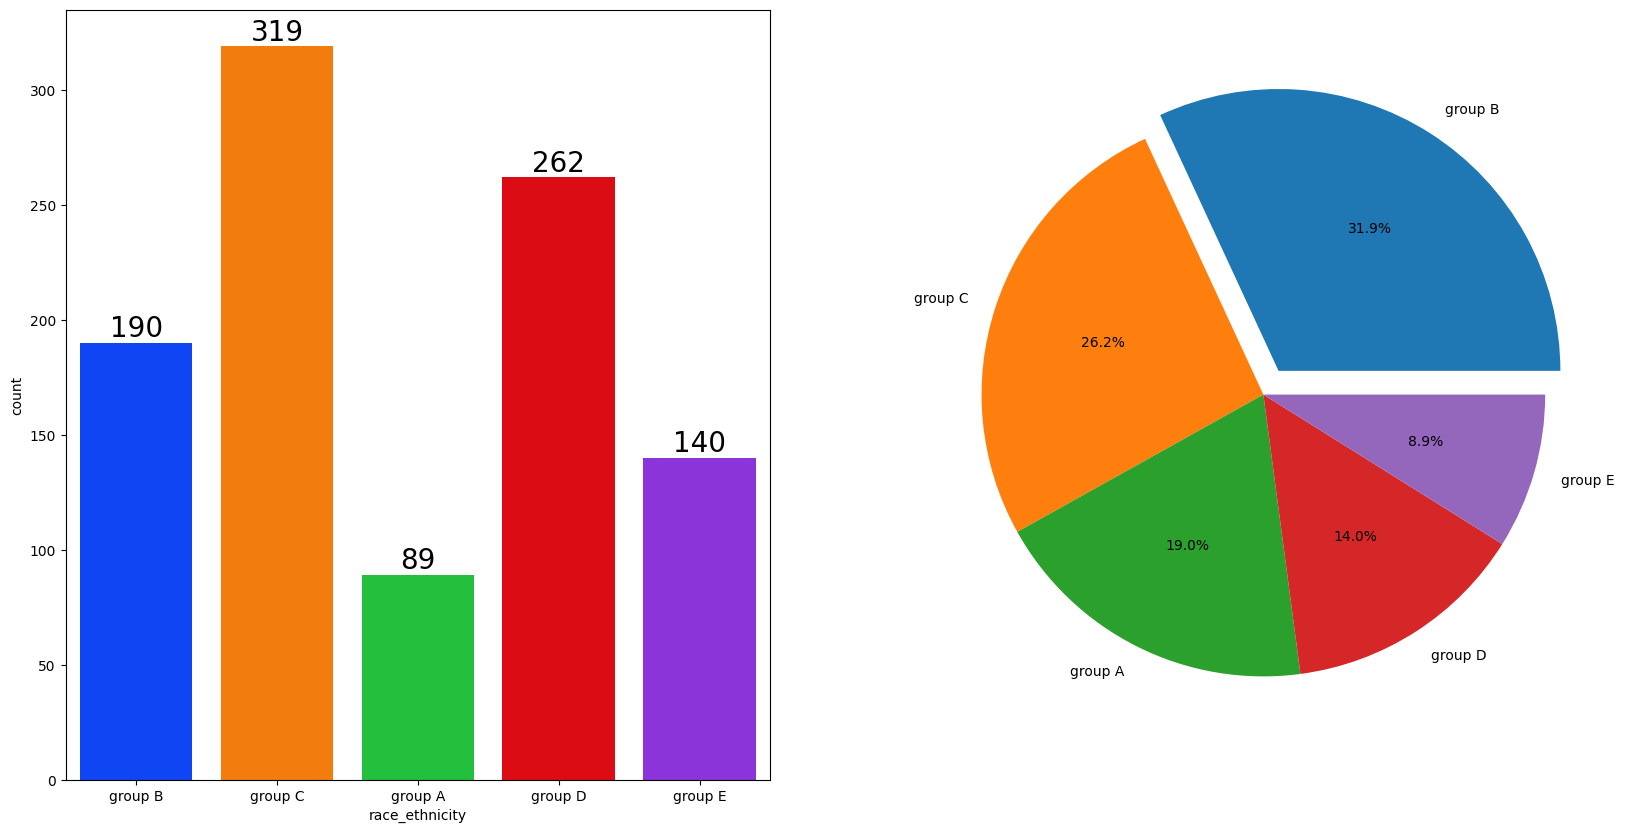

In [172]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x=df.race_ethnicity, data=df, ax=ax[0], palette='bright', saturation=0.9)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df.race_ethnicity.value_counts(), labels= df.race_ethnicity.unique(), autopct='%1.1f%%' ,explode=[0.1,0,0,0,0],)
plt.show()

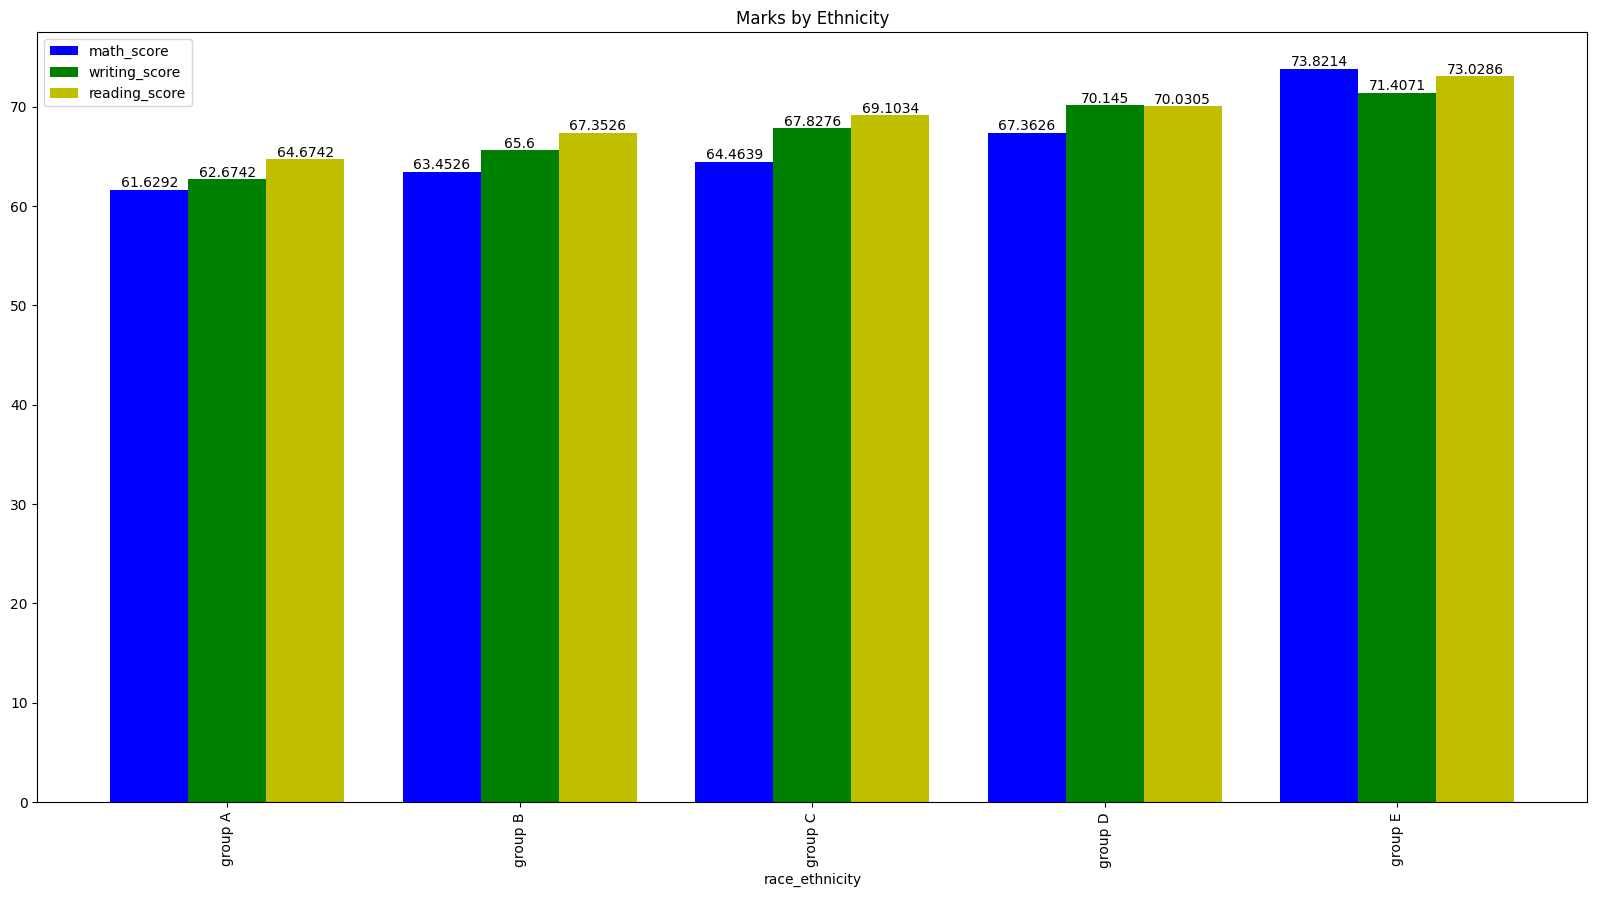

In [230]:
group_race = df.groupby('race_ethnicity', as_index=False)[[feature for feature in df.columns if df[feature].dtype != 'O']].mean()
ax=group_race.sort_values('average').plot(x='race_ethnicity',
                y=['math_score',
                'writing_score', 'reading_score'],
                kind='bar',
                figsize=(20, 10),
                title= 'Marks by Ethnicity',
                width= 0.8,
                color=['b', 'g', 'y'])

for container in ax.containers:
    ax.bar_label(container)

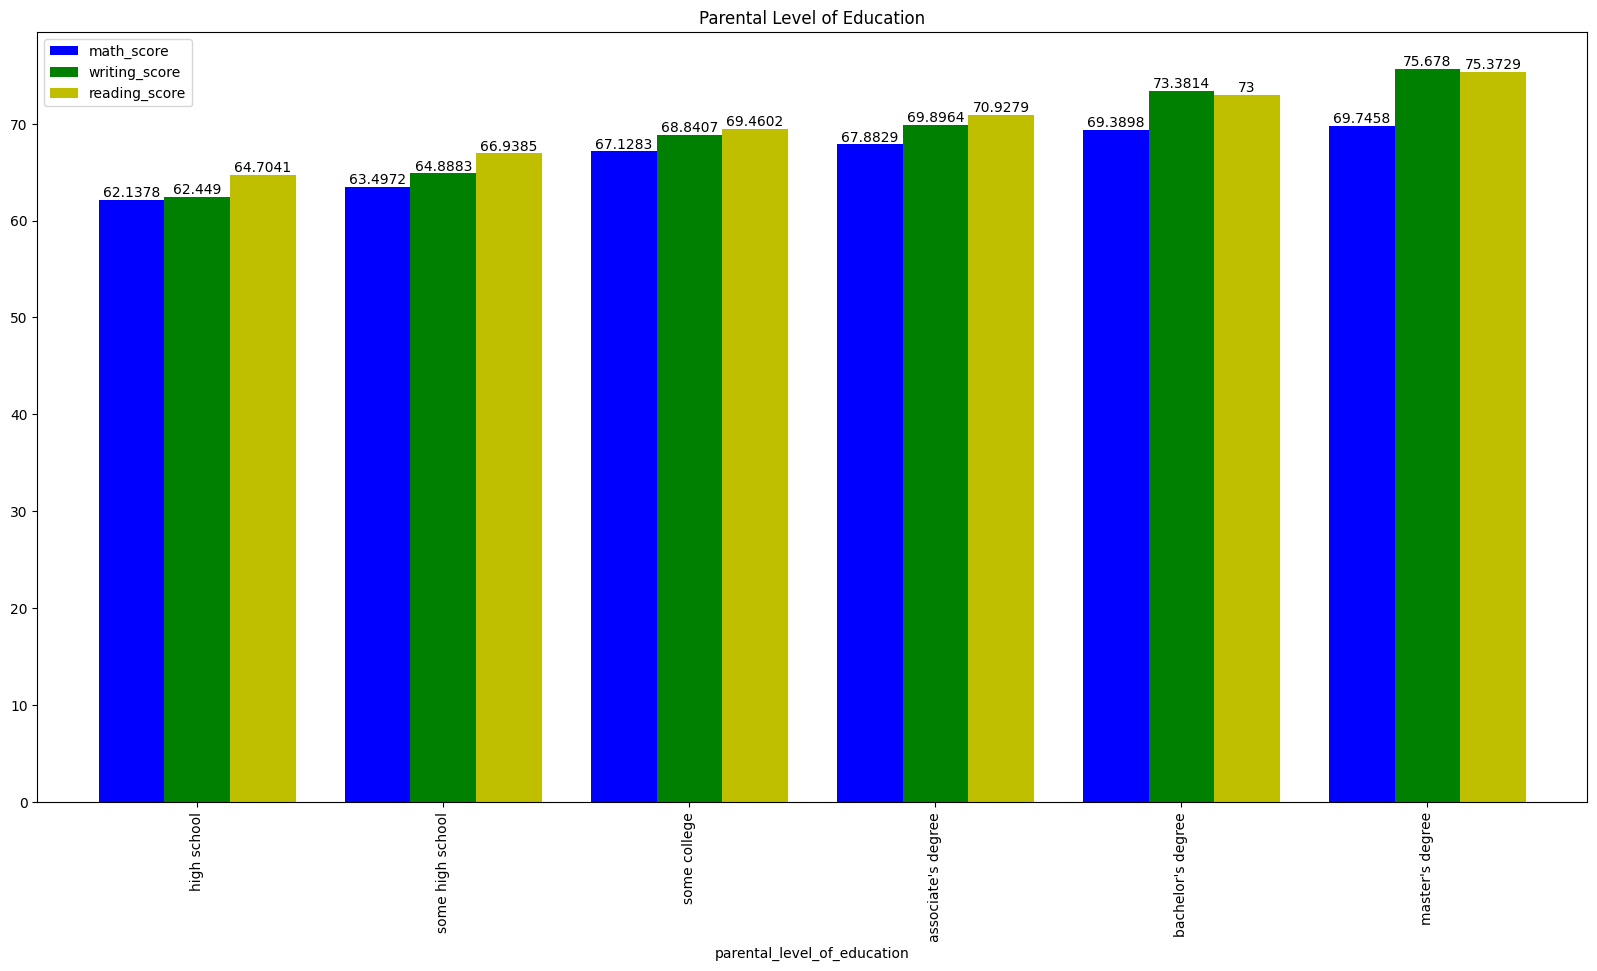

In [231]:
group_race = df.groupby('parental_level_of_education', as_index=False)[[feature for feature in df.columns if df[feature].dtype != 'O']].mean()
ax=group_race.sort_values('average').plot(x='parental_level_of_education',
                y=['math_score',
                'writing_score', 'reading_score'],
                kind='bar',
                figsize=(20, 10),
                title= 'Parental Level of Education',
                width= 0.8,
                color=['b', 'g', 'y'])

for container in ax.containers:
    ax.bar_label(container)

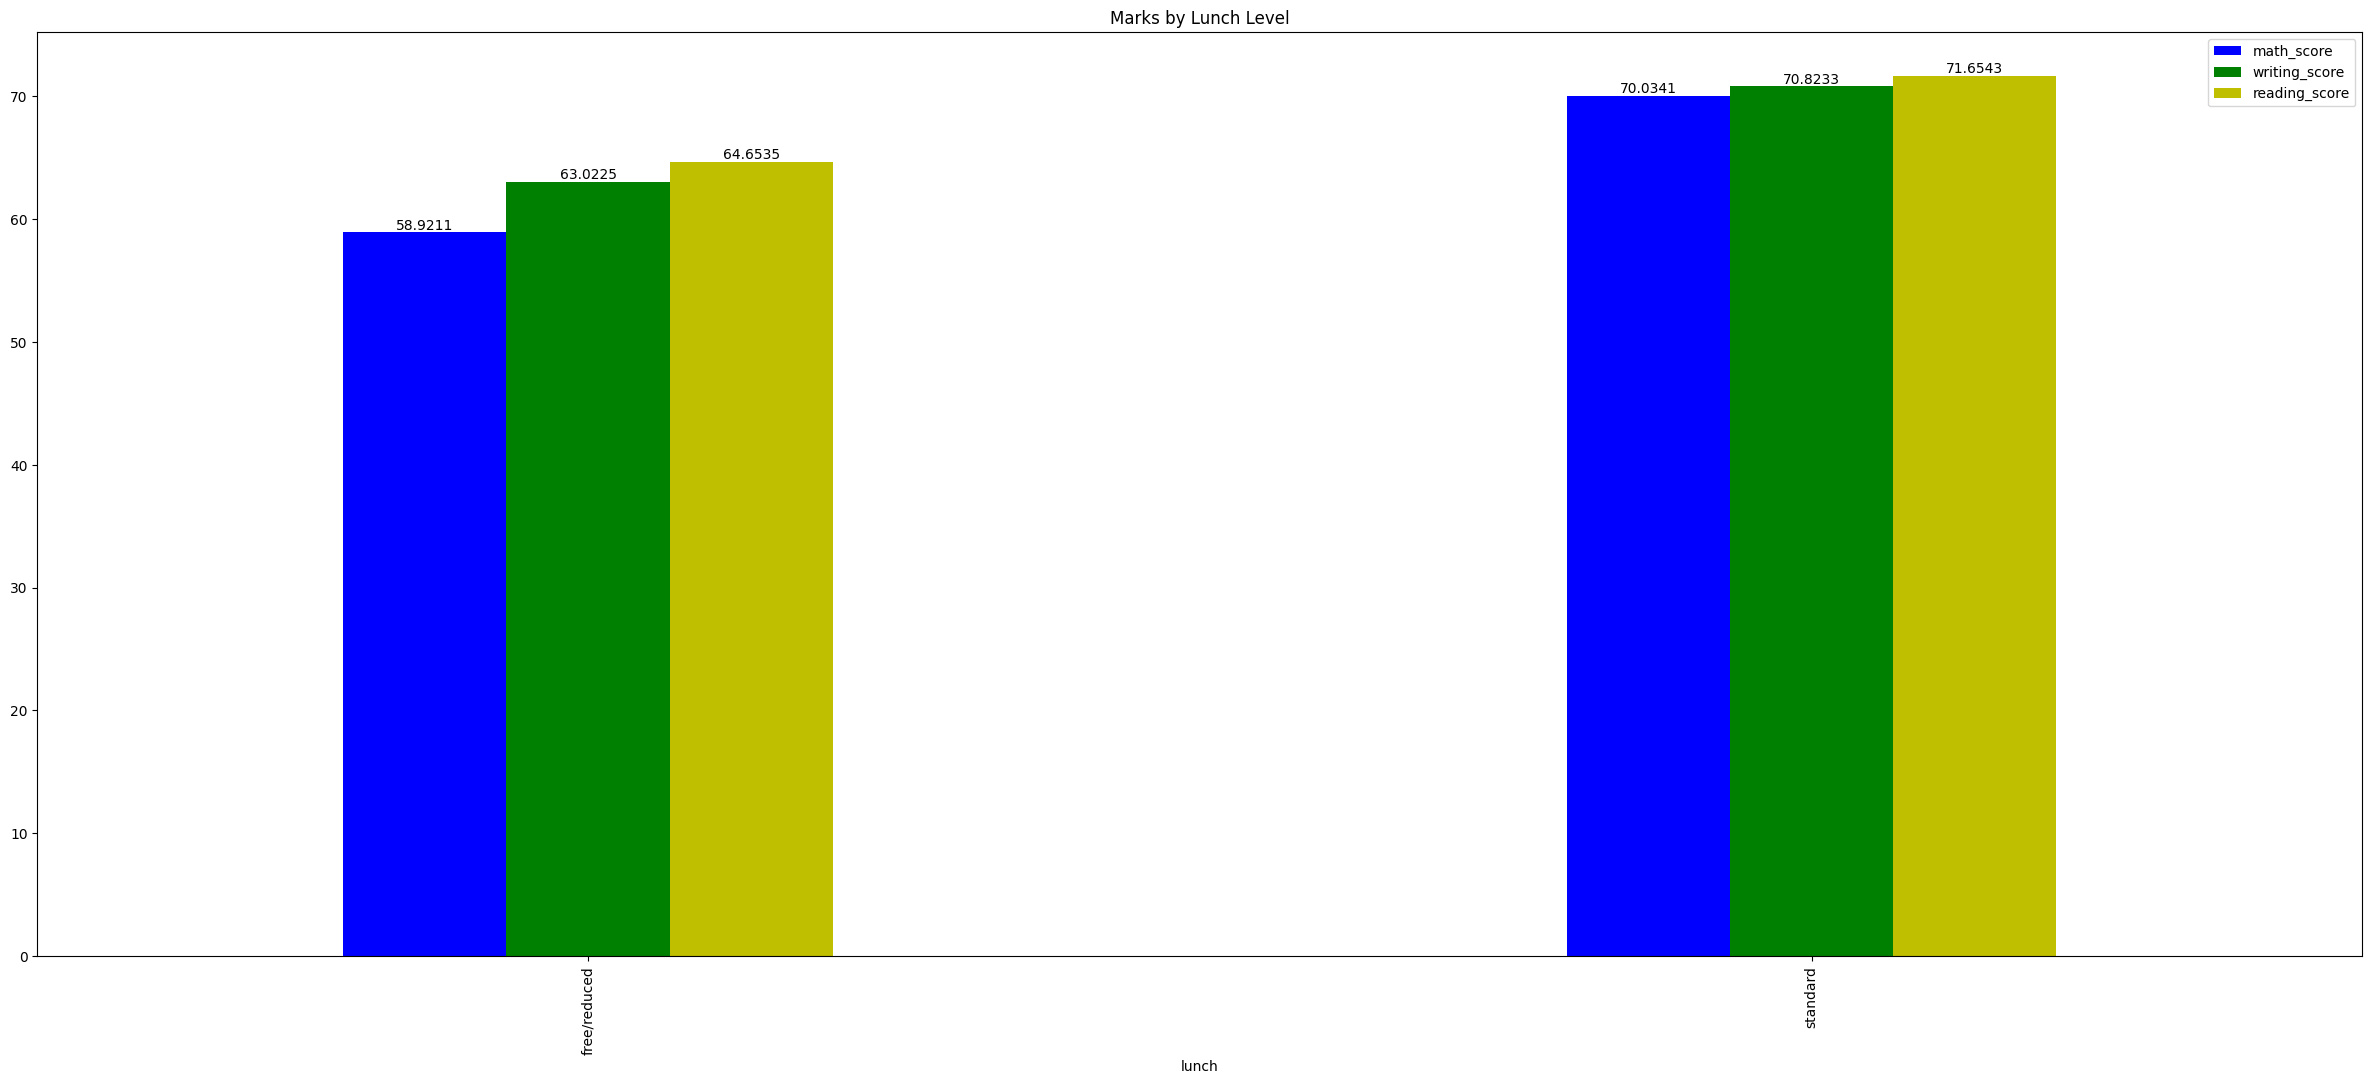

In [233]:
group_race = df.groupby('lunch', as_index=False)[[feature for feature in df.columns if df[feature].dtype != 'O']].mean()
ax=group_race.sort_values('average').plot(x='lunch',
                y=['math_score',
                'writing_score', 'reading_score'],
                kind='bar',
                title= 'Marks by Lunch Level',
                width= 0.4,
                color=['b', 'g', 'y'])

for container in ax.containers:
    ax.bar_label(container)

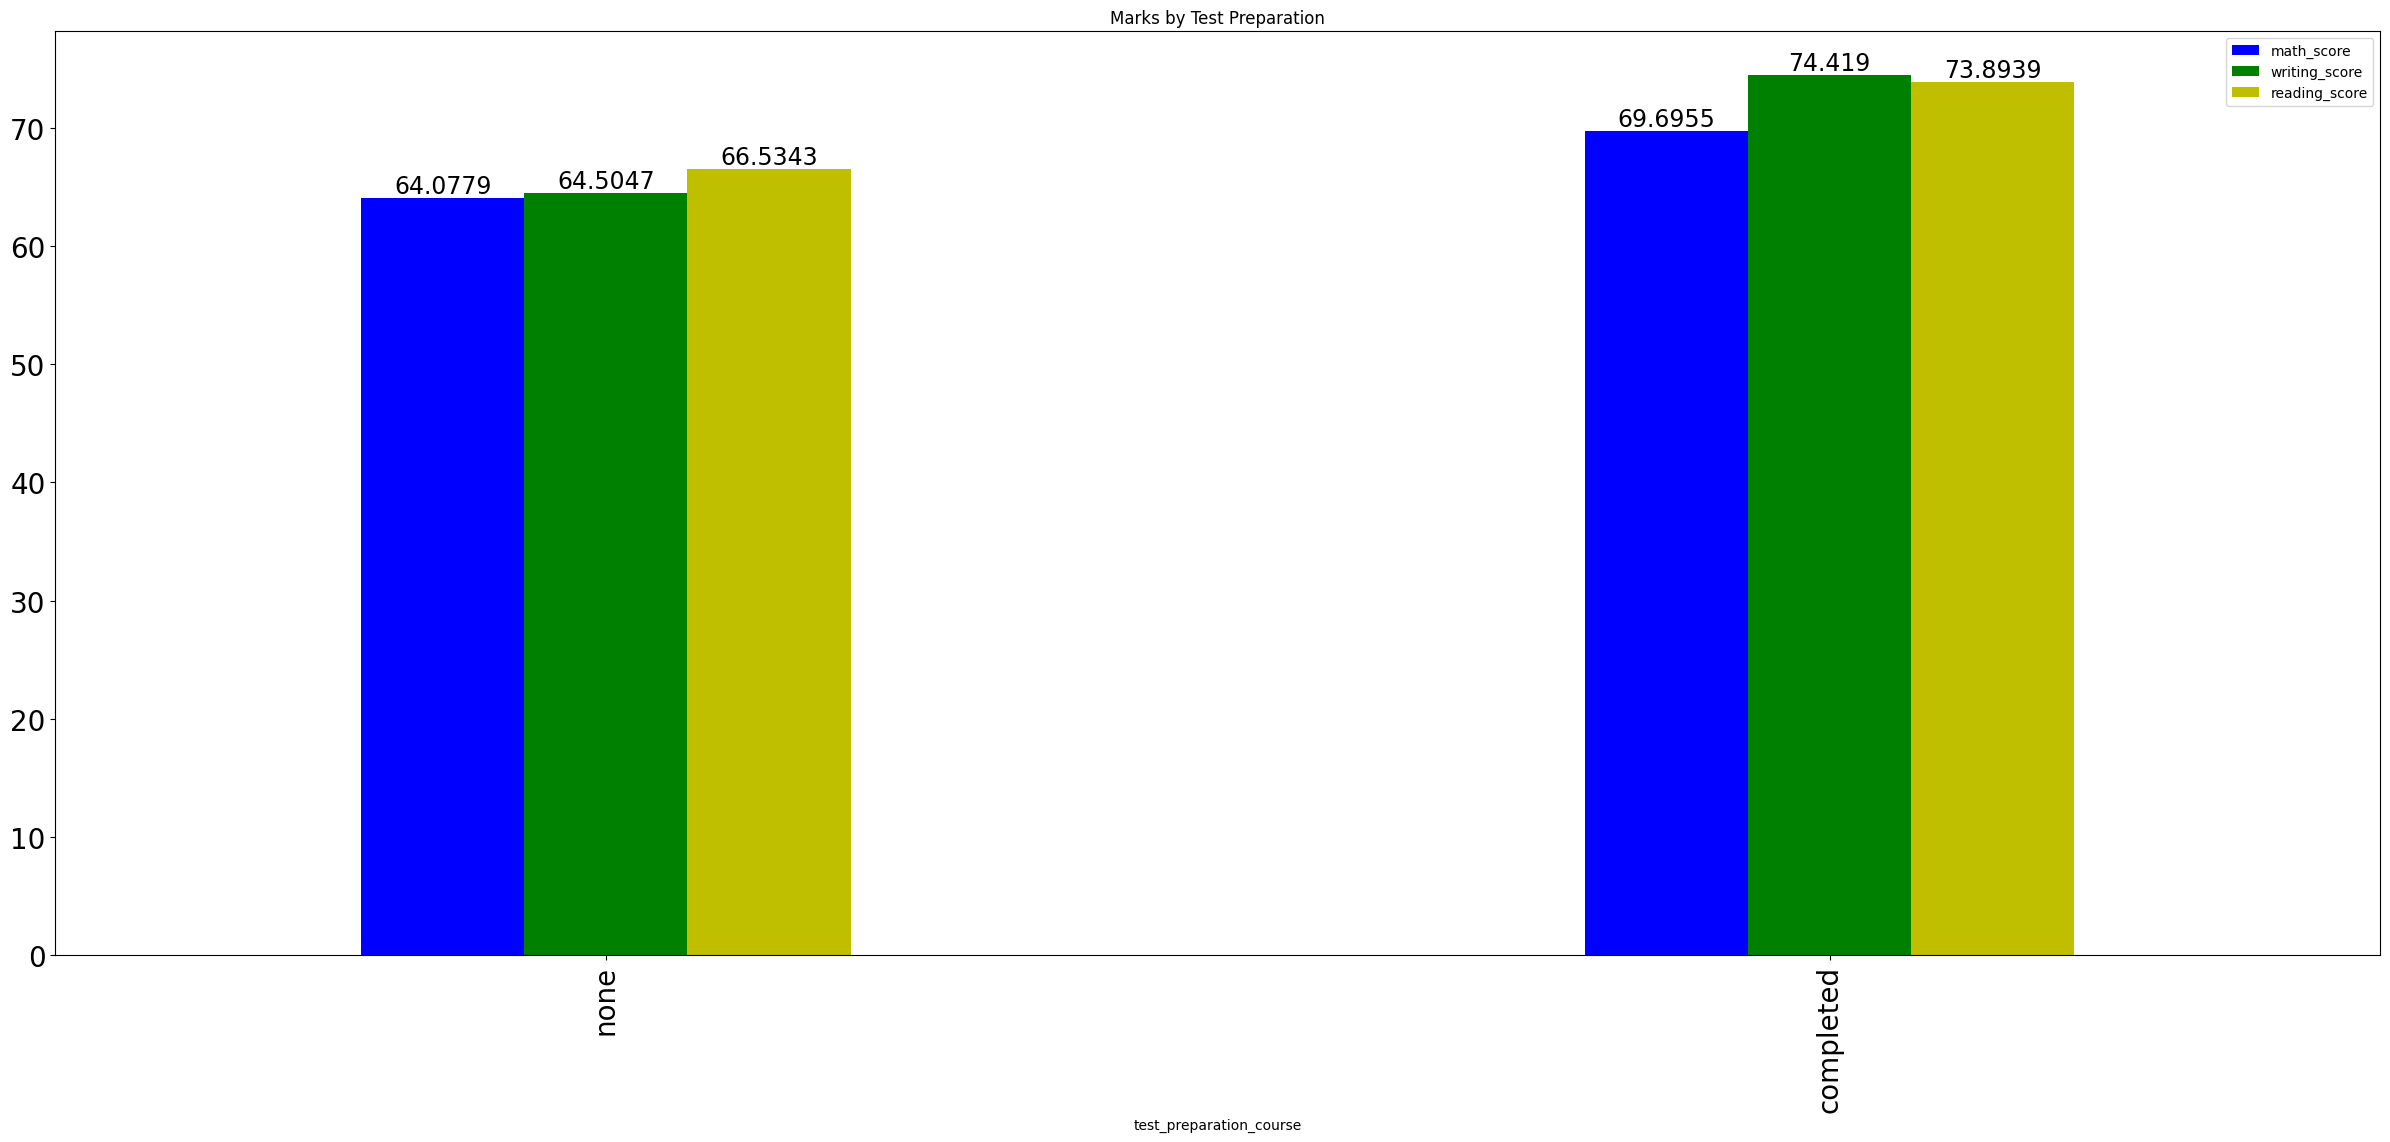

In [239]:
group_race = df.groupby('test_preparation_course', as_index=False)[[feature for feature in df.columns if df[feature].dtype != 'O']].mean()
ax=group_race.sort_values('average').plot(x='test_preparation_course',
                y=['math_score',
                'writing_score', 'reading_score'],
                kind='bar',
                title= 'Marks by Test Preparation',
                width= 0.4,
                color=['b', 'g', 'y'],
                fontsize=20)

for container in ax.containers:
    ax.bar_label(container, fontsize=17)

## Outliers

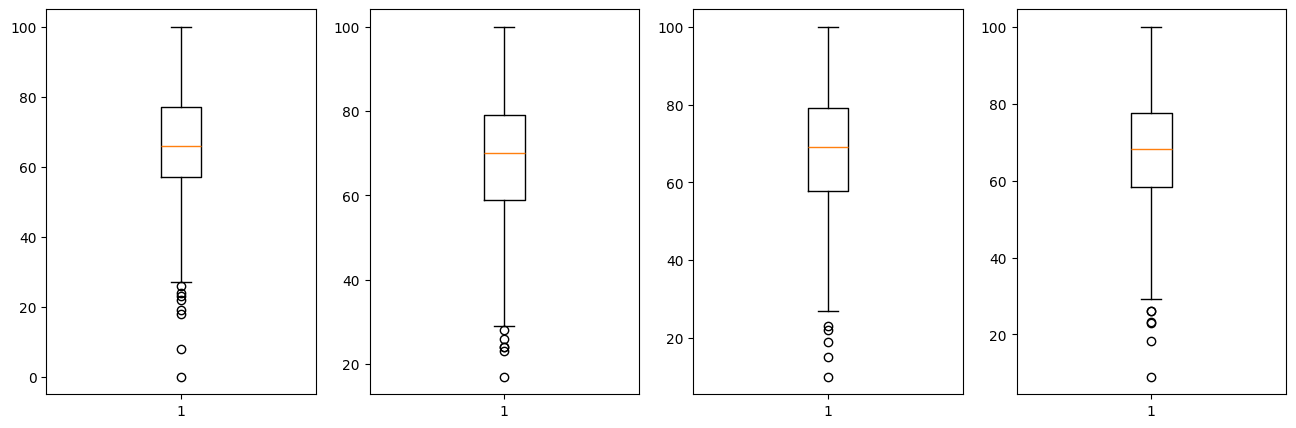

In [242]:
plt.subplots(1,4, figsize=(16,5))
plt.subplot(141)
plt.boxplot(df.math_score)
plt.subplot(142)
plt.boxplot(df.reading_score)
plt.subplot(143)
plt.boxplot(df.writing_score)
plt.subplot(144)
plt.boxplot(df.average)
plt.show()

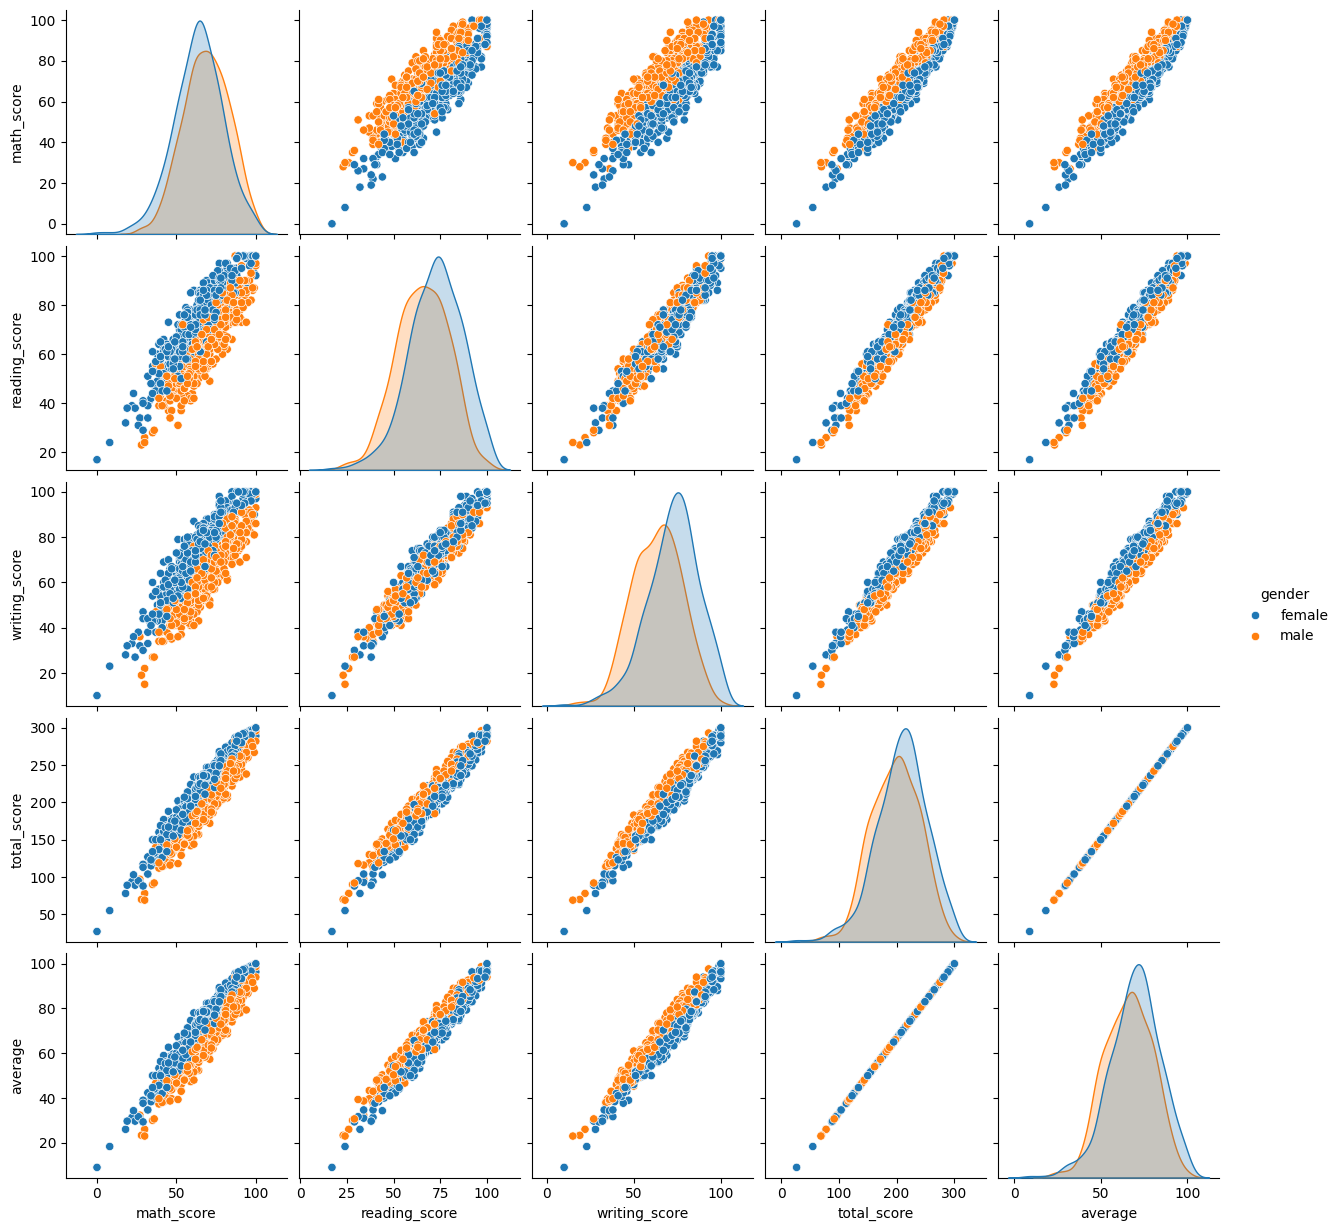

In [243]:
sns.pairplot(df,hue = 'gender')
plt.show()